In [23]:
import numpy as np
import pandas as pd
import mne
from mne.time_frequency import tfr_morlet
import matplotlib.pyplot as plt

Creating RawArray with float64 data, n_channels=14, n_times=1283
    Range : 0 ... 1282 =      0.000 ...     5.008 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=1283
    Range : 0 ... 1282 =      0.000 ...     5.008 secs
Ready.
1 events found
Event IDs: [1]
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 769 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: logratio)


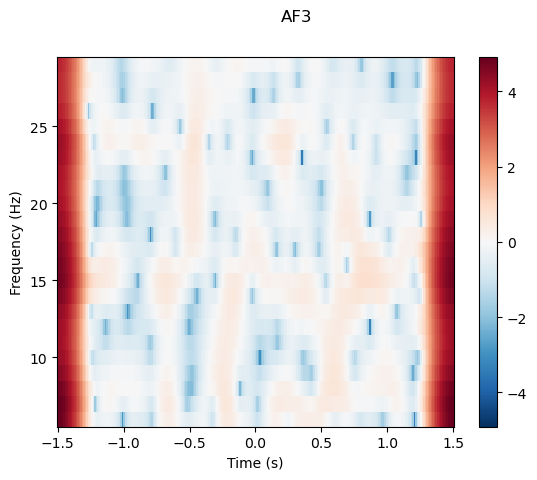

[<Figure size 640x480 with 2 Axes>]

In [24]:
# データの読み込み
#df = pd.read_csv('DP_smoothed1.csv')
df = pd.read_csv('DetectPain_1.csv')
df = pd.read_csv('DetectPain_2.csv')
df = pd.read_csv('DetectPain_3.csv')

# サンプリングレート (Hz)
sfreq = 256

# データの前処理
data = df.drop(columns='Timestamp').values.T  # 'Timestamp' を削除して転置
ch_names = df.columns[1:-1].tolist()  # 'Timestamp' と 'Marker' を除く
n_channels = len(ch_names)

# info オブジェクトの作成
ch_types = ['eeg'] * n_channels  # 全てのチャネルを 'eeg' タイプにする
info = create_info(ch_names=ch_names, sfreq=256, ch_types=ch_types)

# raw オブジェクトの作成
raw = RawArray(data[:-1], info)  # 最後の行 (Marker) は除く

# Marker チャネルを追加
stim_data = data[-1][np.newaxis, :]  # Marker データ
info_stim = create_info(ch_names=['STI'], sfreq=256, ch_types=['stim'])
stim_raw = RawArray(stim_data, info_stim)
raw.add_channels([stim_raw], force_update_info=True)

# イベントを検出
events = mne.find_events(raw, stim_channel='STI')

# イベントIDが1のものだけを取り出す
events = events[events[:, 2] == 1]

# エポック化
tmin = -1.5  # イベントの前後1.5秒を取り出す
tmax = 1.5
epochs = mne.Epochs(raw, events, tmin=tmin, tmax=tmax, baseline=None, preload=True)

# モーレー変換
freqs = np.arange(6, 30, 1)  # 周波数範囲を設定
n_cycles = freqs / 2.  # それぞれの周波数について、少なくとも1サイクルを含む
power = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3, n_jobs=1)

# パワースペクトルをプロット
power.plot([0], baseline=(-0.5, 0), mode='logratio', title=ch_names[0])


1 events found
Event IDs: [1]
Not setting metadata
1 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 257 original time points ...
0 bad epochs dropped
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


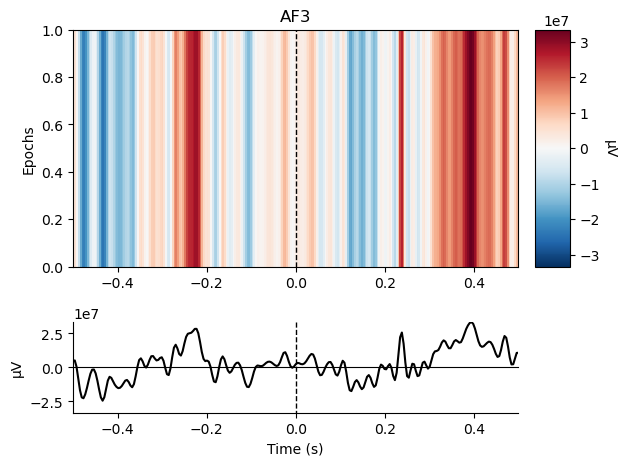

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


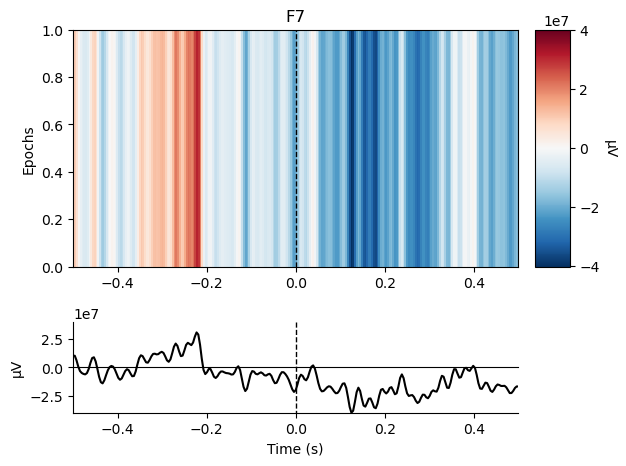

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


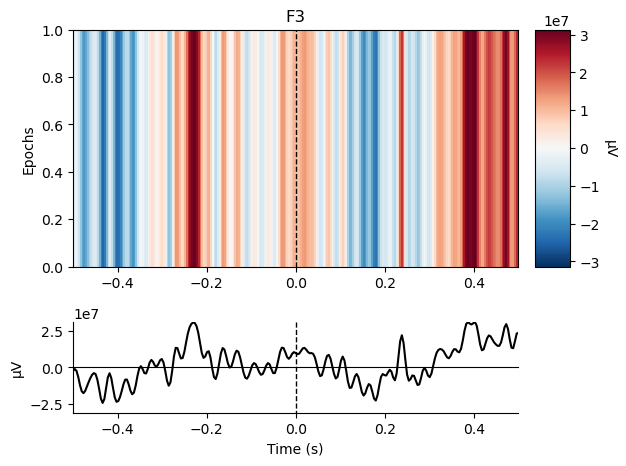

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


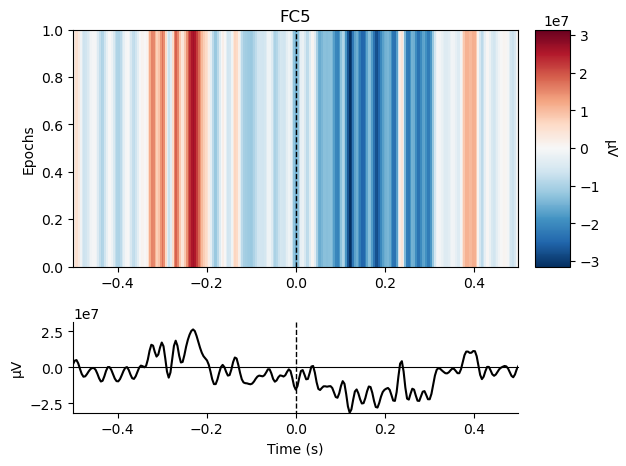

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


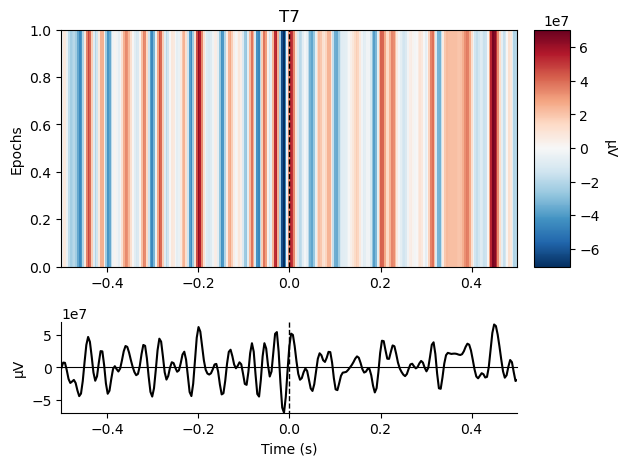

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


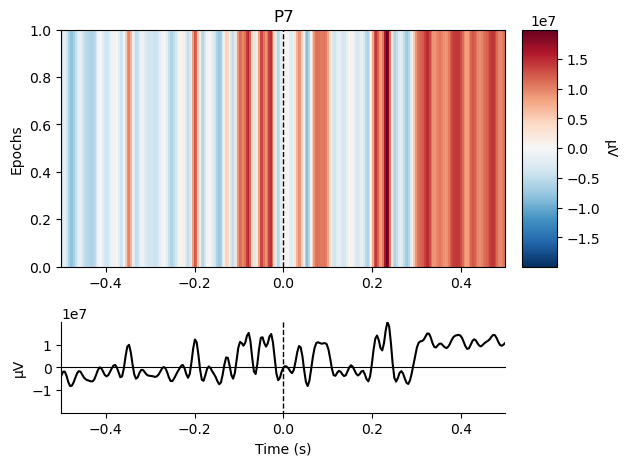

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


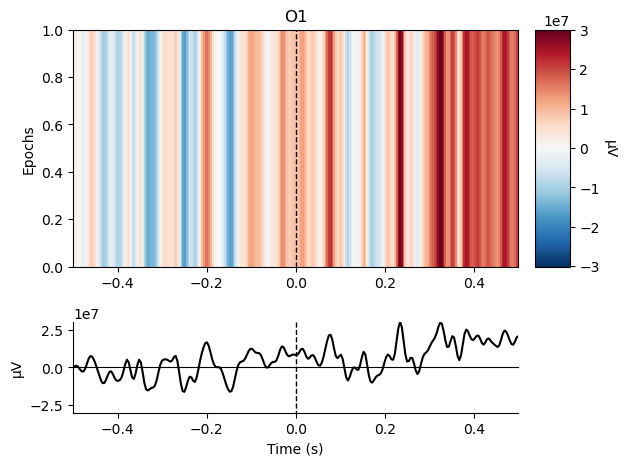

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


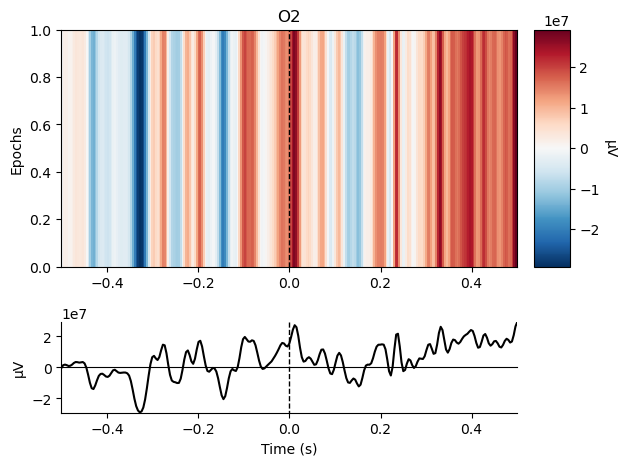

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


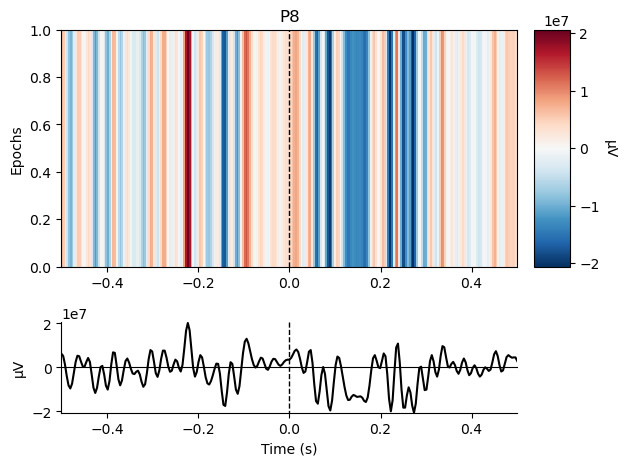

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


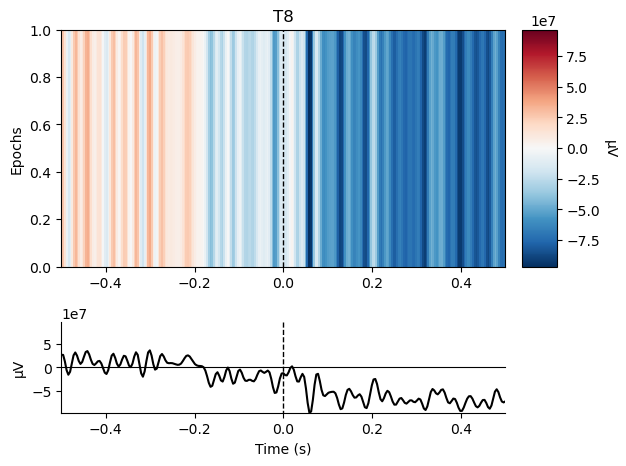

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


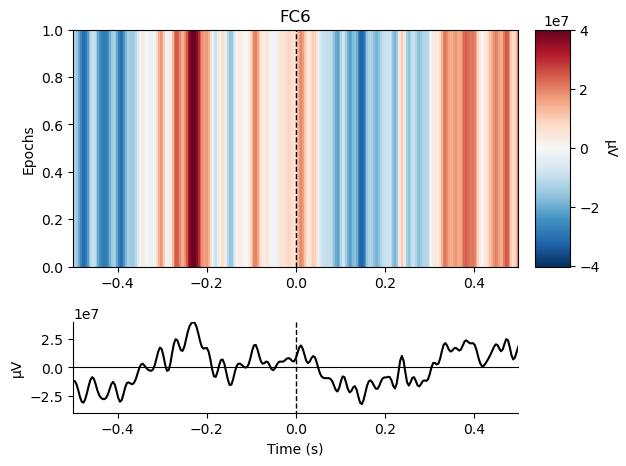

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


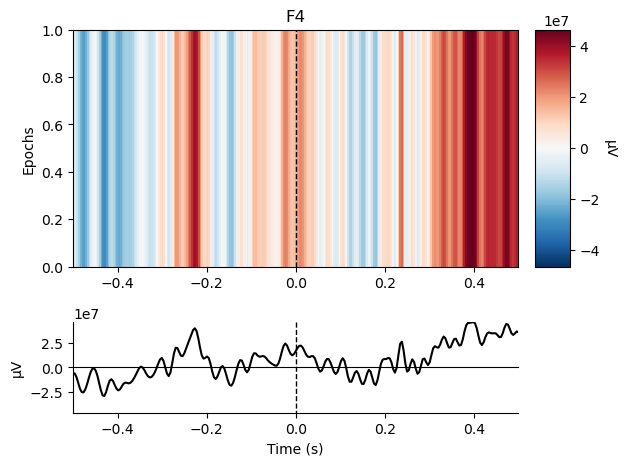

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


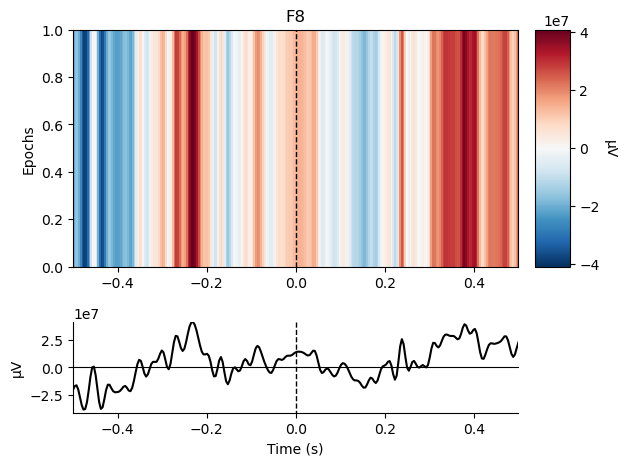

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_144037/2651705222.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=ch)


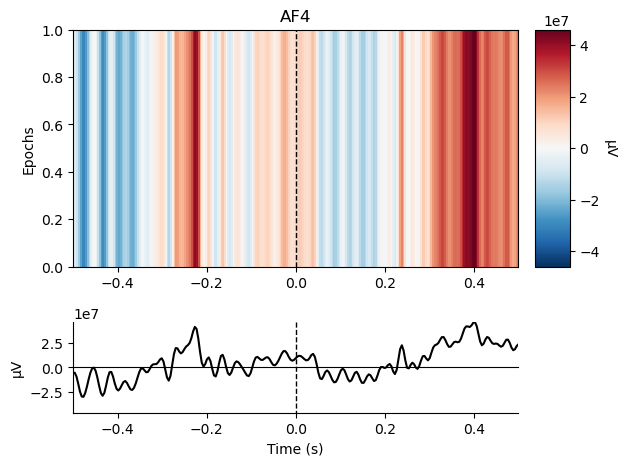

In [25]:
# イベントを見つける
events = mne.find_events(raw, stim_channel='STI', shortest_event=1)

# エポックを作成
event_id = {'Marker': 1}
tmin = -0.5  # start of each epoch (500ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)
baseline = (None, 0)  # means from the first instant to t = 0
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks='eeg', baseline=baseline, preload=True)
epochs.resample(sfreq, npad='auto')  # resample to decrease computational load

# プロット
for ch in epochs.ch_names:
    epochs.plot_image(picks=ch)